#  0. load modules

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

# 1. load patient data

In [2]:
#patient1
contour_path1="Prostate Cases/9/rtss.dcm"
img_path1="Prostate Cases/9/ct"
contour1=pydicom.read_file(contour_path1)
contours1=af.read_structure(contour1)
slices1 = [pydicom.read_file(img_path1 + '/' + s) for s in os.listdir(img_path1)]
image1 = np.stack([s.pixel_array for s in slices1], axis=-1)
label1, colors1 = af.get_mask(contours1, slices1, image1)

In [ ]:
#patient2

In [ ]:
#patient3

# 2. graph about HU and contour

#2.1 HU graph

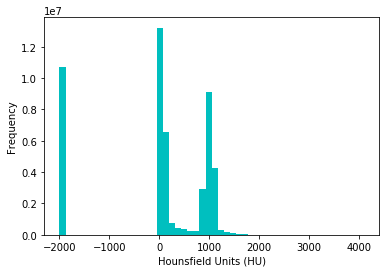

Slice Thickness: 2.500000
Pixel Spacing (row, col): (0.976562, 0.976562) 


In [3]:
#patient1
plt.hist(image1.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices1[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices1[0].PixelSpacing[0], slices1[0].PixelSpacing[1]))

In [4]:
#patient2
plt.hist(image2.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices2[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices2[0].PixelSpacing[0], slices2[0].PixelSpacing[1]))

NameError: name 'image2' is not defined

In [ ]:
#patient3
plt.hist(image3.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices1[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices3[0].PixelSpacing[0], slices3[0].PixelSpacing[1]))

#2.2 contour graph

C:\Users\73707\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


(-0.5, 511.5, 511.5, -0.5)

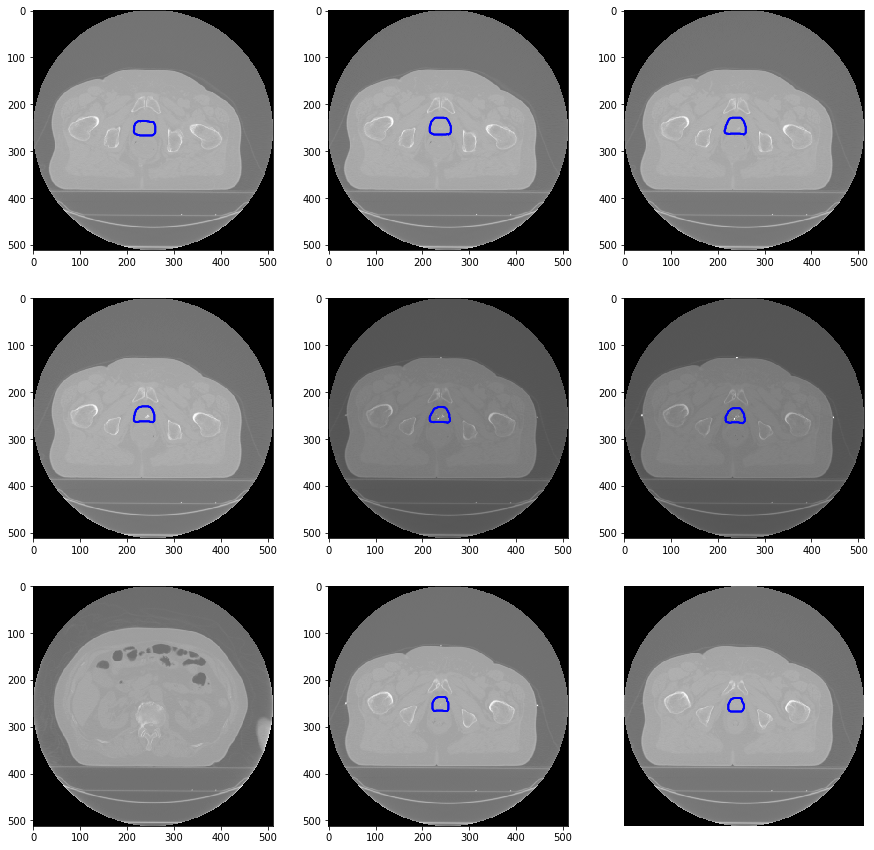

In [5]:
#patient1
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image1[..., i  + 18 ], cmap="gray")
    plt.contour(label1[..., i + 18 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors=colors1)
plt.axis('off')

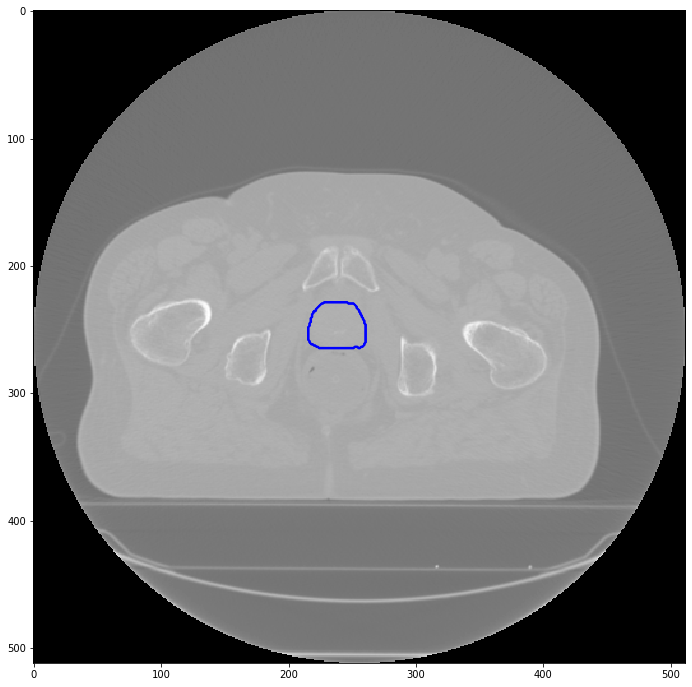

[0 4]


In [6]:
# choose target img for patient1
target_img1 = image1[..., 19]
target_label1 = label1[..., 19]
fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(target_img1, cmap="gray")
plt.contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors=colors1)
plt.show()
print(np.unique(target_label1))

In [7]:
mask1 = np.where(target_label1!=0,4,0)
surface1, interior1 = af.make_surface_contour(mask1)
surface_cord1 = np.argwhere(surface1 != 0).tolist()

In [ ]:
#patient2
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image2[..., i  + 18 ], cmap="gray")
    plt.contour(label2[..., i + 18 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors=colors2)
plt.axis('off')

In [ ]:
# choose target img for patient2
target_img2 = image2[..., 19]
target_label2 = label2[..., 19]
fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(target_img2, cmap="gray")
plt.contour(target_label2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors=colors2)
plt.show()
print(np.unique(target_label2))

In [ ]:
mask2 = np.where(target_label2!=0,4,0)
surface2, interior2 = af.make_surface_contour(mask2)
surface_cord2 = np.argwhere(surface2 != 0).tolist()

In [ ]:
#patient3
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image3[..., i  + 18 ], cmap="gray")
    plt.contour(label3[..., i + 18 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors=colors3)
plt.axis('off')

In [ ]:
# choose target img for patient3
target_img3 = image3[..., 19]
target_label3 = label3[..., 19]
fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(target_img3, cmap="gray")
plt.contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors=colors3)
plt.show()
print(np.unique(target_label3))

In [ ]:
mask3 = np.where(target_label3!=0,4,0)
surface3, interior3 = af.make_surface_contour(mask3)
surface_cord3 = np.argwhere(surface3 != 0).tolist()

# 3. apply assd algorium

# 3.1 different W

(-0.5, 511.5, 511.5, -0.5)

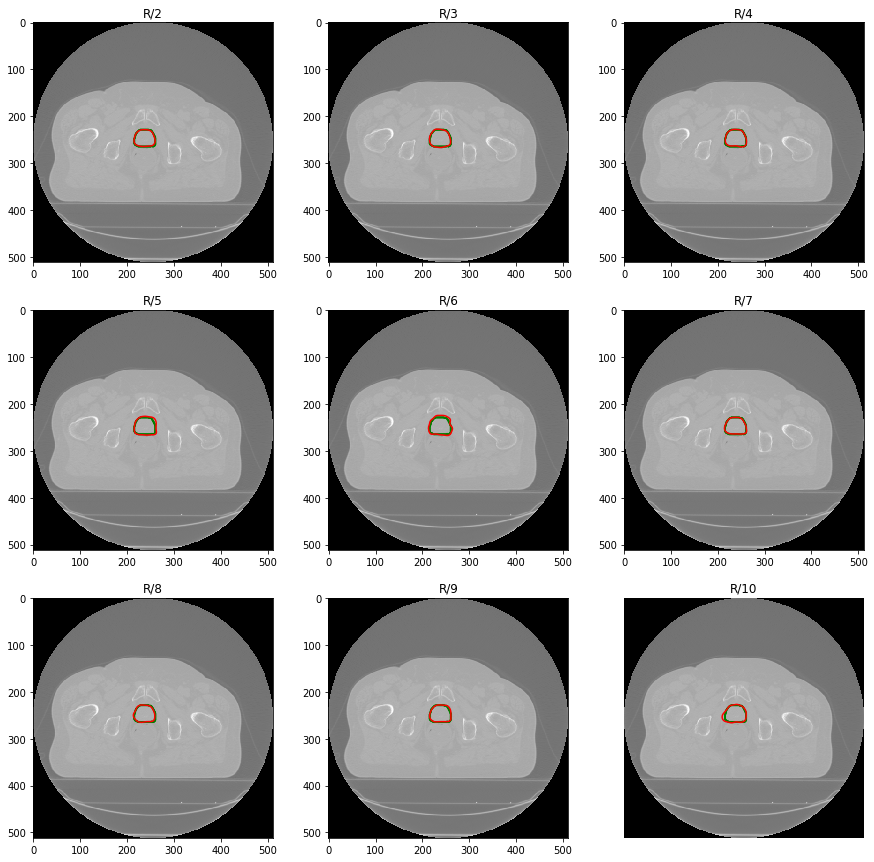

In [8]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
w = [2, 3, 4, 5, 6, 7, 8, 9, 10]
        
for i in range(len(w)):
    c = 4
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=40, w=w[i], smooth=True, blur=True)
    du1 = af.plotting_assd(dx, dy, mask1, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.title("R/" + str(w[i]))
plt.axis('off')

In [ ]:
#patient2
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
w = [2, 3, 4, 5, 6, 7, 8, 9, 10]
        
for i in range(len(w)):
    c = 4
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask, t, L  = af.assd(target_img2, target_label2, voxelsize, a, SD, circles=3, k=40, w=w[i], smooth=True, blur=True)
    du2 = af.plotting_assd(dx, dy, mask2, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img2, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.title("R/" + str(w[i]))
plt.axis('off')

In [ ]:
#patient3
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
w = [2, 3, 4, 5, 6, 7, 8, 9, 10]
        
for i in range(len(w)):
    c = 4
    SD=[c*1.7, c*2, c*2.5]
    dx, dy, mask3, t, L  = af.assd(target_img, target_label, voxelsize, a, SD, circles=3, k=40, w=w[i], smooth=True, blur=True)
    du = af.plotting_assd(dx, dy, mask, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img, cmap="gray")
    #plt.title("k = " + str(K[i]))
    plt.contour(mask3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.title("R/" + str(w[i]))
plt.axis('off')

# 3.2 different c

(-0.5, 511.5, 511.5, -0.5)

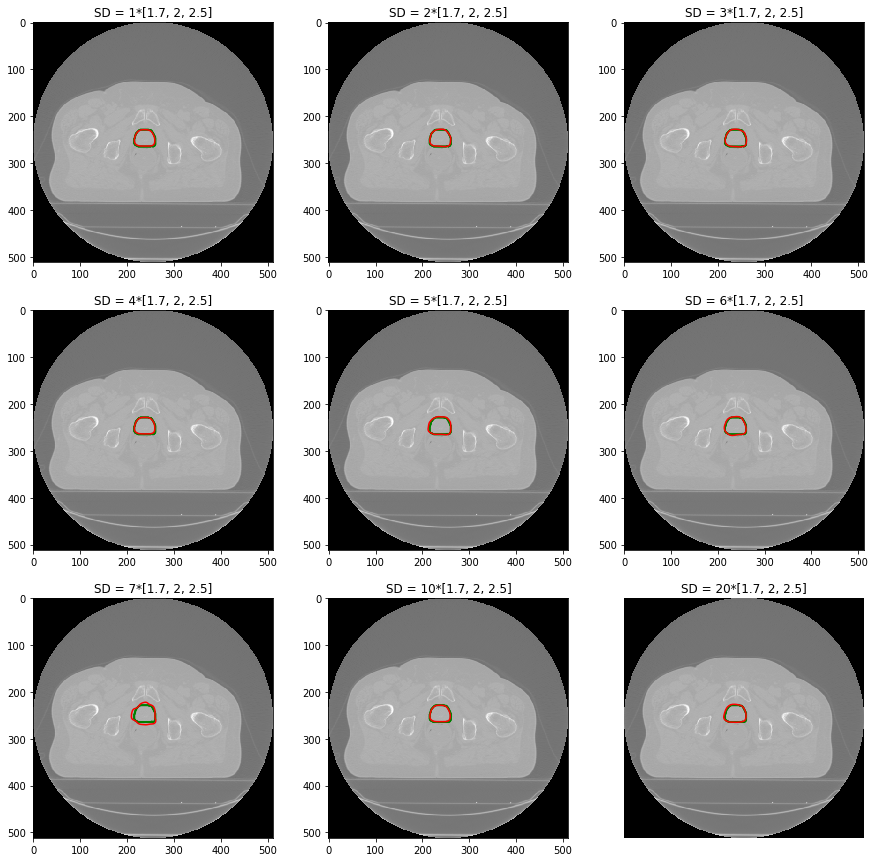

In [10]:
#patient1
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
c = [1, 2, 3, 4, 5, 6, 7, 10, 20]
        
for i in range(len(c)):
    SD=[c[i]*1.7, c[i]*2, c[i]*2.5]
    dx, dy, mask1, t, L  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, k=40, w=4, smooth=True, blur=False)
    du1 = af.plotting_assd(dx, dy, mask1, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.title("SD = " + str(c[i]) + "*[1.7, 2, 2.5]")
plt.axis('off')

In [ ]:
#patient2
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))
c = [1, 2, 3, 4, 5, 6, 7, 10, 20]
        
for i in range(len(c)):
    SD=[c[i]*1.7, c[i]*2, c[i]*2.5]
    dx, dy, mask2, t, L  = assd(target_img2, target_label2, voxelsize, a, SD, circles=3, k=40, w=4, smooth=True, blur=False)
    du2 = plotting_assd(dx, dy, mask2, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img2, cmap="gray")
    plt.contour(mask2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.title("SD = " + str(c[i]) + "*[1.7, 2, 2.5]")
plt.axis('off')

In [ ]:
#patient3
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

plt.figure(figsize=(15, 15))        
c = [1, 2, 3, 4, 5, 6, 7, 10, 20]
        
for i in range(len(c)):
    SD=[c[i]*1.7, c[i]*2, c[i]*2.5]
    dx, dy, mask3, t, L  = assd(target_img3, target_label3, voxelsize, a, SD, circles=3, k=40, w=4, smooth=True, blur=False)
    du3 = plotting_assd(dx, dy, mask3, quiver=False, plot=False)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img3, cmap="gray")
    plt.contour(mask3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.title("SD = " + str(c[i]) + "*[1.7, 2, 2.5]")
plt.axis('off')

# 4. limitations and future works